In [43]:
import pandas as pd
import numpy as np 
import time
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score     
from sklearn.model_selection import train_test_split 
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingRegressor 
from matplotlib.pyplot import MultipleLocator
from sklearn.model_selection import RandomizedSearchCV
import warnings
import os 
import string 
import torch
warnings.filterwarnings("ignore")

In [44]:
# Read data
df = pd.read_excel('../../Feature_CO.xlsx', sheet_name= "ML_features")
features = df.iloc[:,:-1]

# remove high correlated features
features3 = features.drop(columns=['$\\mathregular{χ_{NM(0-3)}}$',
                                   '$\\mathregular{m_{NM(0-3)}}$',
                                   '$\\mathregular{r_{NM(3-4)}}$',
                                   '$\\mathregular{m_{NM(3-4)}}$',
                                   '$\\mathregular{χ_{NM(4-5)}}$',
                                   '$\\mathregular{r_{NM(4-5)}}$',
                                   '$\\mathregular{m_{M}}$',
                                    '$\\mathregular{χ_{M}}$',])
features = features3
target_CO = df.iloc[:,-1]

# Hyperparameter tuning

In [45]:
# Instantiate regressor algorithms
GBR = GradientBoostingRegressor(random_state=42)
model = GBR

# Feature normalization (standardize the descriptor)
features = (features - features.mean(axis=0)) / features.std(axis=0)
X_train, X_test, y_train, y_test = train_test_split(features, target_CO, train_size= 0.8, random_state=45)       

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

model_grid = {'loss':['ls', 'lad', 'huber', 'quantile'],
             'n_estimators': [10,50,100],
             'learning_rate':[0.05, 0.1, 0.15],
             'max_depth':[2,3,4],
             'min_samples_split':[2,3,5],
             'min_samples_leaf':[1,2,4]}
model.get_params().keys()

model_grid_cv = RandomizedSearchCV(estimator=model,
                        param_distributions=model_grid,
                        n_iter=100,
                        cv=10,
                        verbose= True)
model_grid_cv.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=GradientBoostingRegressor(random_state=42),
                   n_iter=100,
                   param_distributions={'learning_rate': [0.05, 0.1, 0.15],
                                        'loss': ['ls', 'lad', 'huber',
                                                 'quantile'],
                                        'max_depth': [2, 3, 4],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 5],
                                        'n_estimators': [10, 50, 100]},
                   verbose=True)

In [46]:
model_optimized = model_grid_cv.best_estimator_
# print (model_optimized)

# feature importance 

In [47]:
headers = features.columns.values.tolist()
headers[0]
len(headers)
# headers
headers

['$\\mathregular{r_{NM(0-3)}}$',
 '$\\mathregular{χ_{NM(3-4)}}$',
 '$\\mathregular{m_{NM(4-5)}}$',
 '$\\mathregular{χ_{NM(0-3)}}$-$\\mathregular{χ_{M}}$',
 '$\\mathregular{χ_{NM(3-4)}}$-$\\mathregular{χ_{M}}$',
 '$\\mathregular{χ_{NM(4-5)}}$-$\\mathregular{χ_{M}}$',
 'Z',
 '$\\mathregular{r_{M}}$',
 '$\\mathregular{G_{M}}$',
 '$\\mathregular{e_{d}}$',
 'I1',
 '$\\mathregular{ε_{d}}$',
 '$\\mathregular{H_{of}}$',
 '$\\mathregular{EA_{M}}$']

14
[0.01283427 0.01384838 0.02057628 0.02234662 0.0280536  0.03173012
 0.03461492 0.05318644 0.05562735 0.06777241 0.10313573 0.10814647
 0.15221908 0.29590833]
['$\\mathregular{G_{M}}$' 'I1' '$\\mathregular{H_{of}}$'
 '$\\mathregular{e_{d}}$'
 '$\\mathregular{χ_{NM(4-5)}}$-$\\mathregular{χ_{M}}$'
 '$\\mathregular{r_{NM(0-3)}}$' '$\\mathregular{ε_{d}}$'
 '$\\mathregular{χ_{NM(3-4)}}$-$\\mathregular{χ_{M}}$'
 '$\\mathregular{EA_{M}}$' '$\\mathregular{m_{NM(4-5)}}$'
 '$\\mathregular{r_{M}}$' '$\\mathregular{χ_{NM(3-4)}}$'
 '$\\mathregular{χ_{NM(0-3)}}$-$\\mathregular{χ_{M}}$' 'Z']


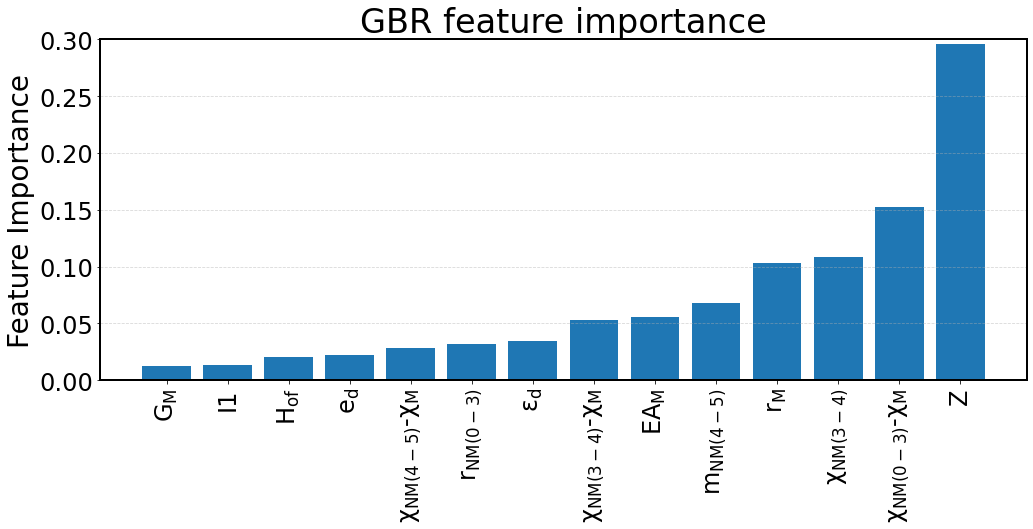

In [48]:
importances = model_optimized.feature_importances_
headers = headers 
print (len(headers))

sorted_idx = np.argsort(importances)
sorted_idx

importances_2 = importances[sorted_idx]
print (importances_2)

headers_2 = np.array(headers)[sorted_idx]
# headers = headers[len(headers)]
print (headers_2)

fig, ax = plt.subplots( figsize=(15, 8))


font={'weight':'normal', 
      'size': 28}
plt.rc('font', **font)


# ax.barh(importances_2,
#         headers_2,
#         height=0.7)

plt.bar(headers_2, importances_2,)

# ax.set_xlabel("Feature Importance", fontsize = 28)
ax.set_ylabel("Feature Importance", fontsize = 28)
ax.tick_params(axis='y', )
ax.tick_params(axis='x', rotation = 90)

plt.tick_params(labelsize=24)

ax.spines['bottom'].set_linewidth(2);
ax.spines['left'].set_linewidth(2);  
ax.spines['right'].set_linewidth(2); 
ax.spines['top'].set_linewidth(2); 
plt.title('GBR feature importance')
# plt.title('$\mathregular{χ_{NM}}$(4-5)-χ_M')
plt.grid(axis='y', ls='--', alpha=0.5)


ax.set_ylim(0, 0.30)

plt.tight_layout()
# fig.savefig('Feature importance_all-heng.jpeg', dpi=600,)

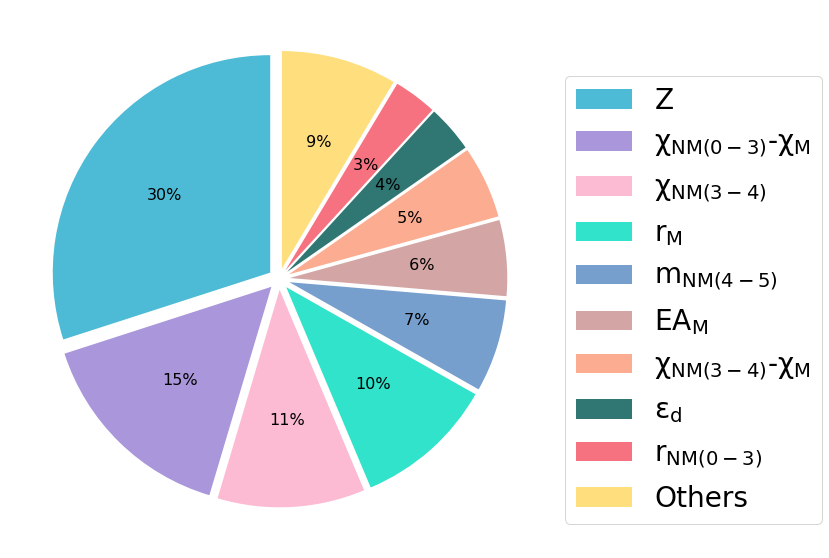

In [49]:
# Feature Importance Pie Chart

# Sort the indices based on feature importances
sorted_idx = np.argsort(importances)

# Get the sorted importances
importances_2 = importances[sorted_idx]

# Number of features to display in the pie chart
feature_numbers = 13

# Sort feature importances and get the top indices
feature_idx = (-model_optimized.feature_importances_).argsort()[:feature_numbers]

# Get the names of the top features
name_features = np.array(headers)[feature_idx]

# Get the feature importances of the selected features
selected_features = model_optimized.feature_importances_[feature_idx]

# Only display the top ten features and combine the rest into 'Others'
top_sizes = selected_features[:9]
top_labels = name_features[:9]

other_label = 'Others'
other_size = sum(selected_features[9:])

# Prepare data for the pie chart
labels_to_plot = np.append(top_labels, [other_label])
sizes_to_plot = np.append(top_sizes, [other_size])

# Plotting the pie chart
fig, ax = plt.subplots(figsize=(15, 10))
wedges, texts, autotexts = plt.pie(sizes_to_plot, 
                                   colors=['#4DBBD5', '#aa96da', '#FCBAD3', '#30e3ca', '#769fcd', 
                                           '#d4a5a5', '#fbac91', '#307672', '#f67280', '#ffde7d'],
                                   explode=[0.05]*10,
                                   startangle=90,
                                   textprops={'weight': 'normal', 'size': 16},
                                   autopct='%2.f%%',
                                  )

# Add legend with labels and adjust the position
ax.legend(labels_to_plot, bbox_to_anchor=(1, 0, 0, 0.9), fontsize=28, ncol=1)

# Save the figure
fig.savefig('Feature_importance.jpg', dpi=600, bbox_inches='tight')

# Show the plot
plt.show()


# Visualization of decision tree 

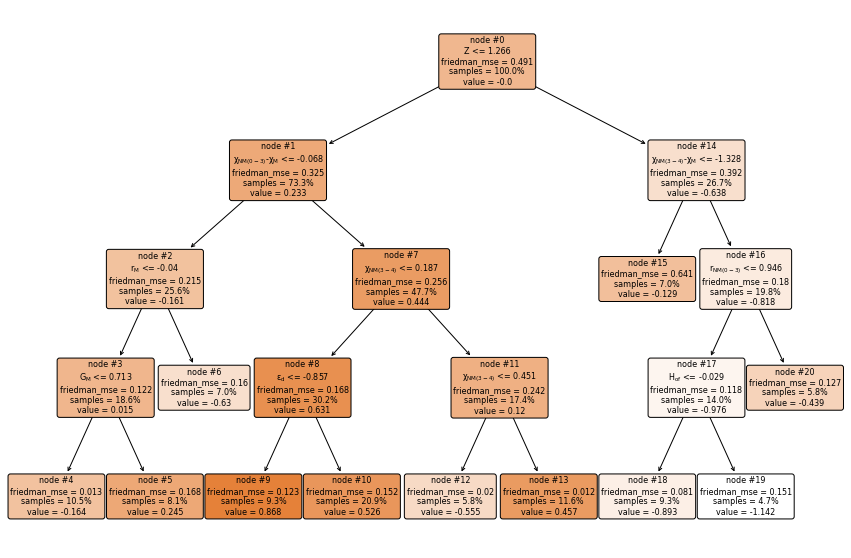

In [50]:
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Get feature names from the dataset
headers = features.columns.values.tolist()

# Set font size for plots
font = {'size': 20}
plt.rc("font", **font)

# Get the first decision tree in the ensemble
first_tree = model_optimized.estimators_[0][0]

# Get the leaf node indices of the tree
leaf_node_indices = first_tree.apply(X_train)

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(first_tree, feature_names=headers, filled=True, impurity=True, proportion=True, rounded=True, node_ids=True, fontsize=8)

# Get the leaves' index from the tree
leaves = first_tree.apply(X_train) == -1

# Get the matplotlib Patch objects representing the nodes in the tree plot
patches = plt.gca().patches

# Set the face color of the leaf nodes to red
for node_id, patch in enumerate(patches):
    if leaves[node_id]:
        patch.set_facecolor('red')

# Save the plot as an image
# plt.savefig('tree_0.jpg', dpi=600, bbox_inches='tight')
plt.show()


# 500 trials repeat 

In [51]:
# Initialize lists to store metrics for training and testing
R2_2nd = []
RMSE_2nd = []
R2_2nd_test = []
RMSE_2nd_test = []

# Run the experiment 500 times
print('--- start 500 trials repeat ---')
for i in range(500):
    # Randomly split data
    X_train, X_test, y_train, y_test = train_test_split(features, target_CO, train_size=0.8)
    
    # Predictions and evaluation for training set
    y_tr_pred = model_optimized.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_tr_pred, y_train))
    R_squr_train = r2_score(y_train, y_tr_pred)
    
    #print('RMSE for training (v2): {:.4f} eV'.format(rmse_train))
    #print('R^2 for train {:.4f}'.format(R_squr_train))
    
    # Store metrics for training set
    RMSE_2nd.append(rmse_train)
    R2_2nd.append(R_squr_train)
    
    # Predictions and evaluation for testing set
    y_te_pred = model_optimized.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_te_pred, y_test))
    R_squr_test = r2_score(y_test, y_te_pred)
    
    #print('RMSE for testing (v2): {:.4f} eV'.format(rmse_test))
    #print('R^2 for test {:.4f}'.format(R_squr_test))
    
    # Store metrics for testing set
    RMSE_2nd_test.append(rmse_test)
    R2_2nd_test.append(R_squr_test)

# Create DataFrames from the collected metrics
text1 = pd.DataFrame({'gbr-rmse': RMSE_2nd})
text2 = pd.DataFrame({'gbr-r2': R2_2nd})
text3 = pd.DataFrame({'gbr-rmse_test': RMSE_2nd_test})
text4 = pd.DataFrame({'gbr-r2_test': R2_2nd_test})

# Calculate and print average values for training set
avg_rmse_train = np.mean(RMSE_2nd)
avg_r2_train = np.mean(R2_2nd)

print('Average RMSE for training set: {:.3f} eV'.format(avg_rmse_train))
print('Average R^2 for training set: {:.3f}'.format(avg_r2_train))

# Calculate and print average values for testing set
avg_rmse_test = np.mean(RMSE_2nd_test)
avg_r2_test = np.mean(R2_2nd_test)

print('Average RMSE for testing set: {:.3f} eV'.format(avg_rmse_test))
print('Average R^2 for testing set: {:.3f}'.format(avg_r2_test))

--- start 500 trials repeat ---
Average RMSE for training set: 0.117 eV
Average R^2 for training set: 0.970
Average RMSE for testing set: 0.113 eV
Average R^2 for testing set: 0.964


In [64]:
# Concatenate DataFrames along columns
result_df = pd.concat([text1, text2, text3, text4], axis=1)

# Write the concatenated DataFrame to an Excel file
result_df.to_excel('GBR_500_trials_repeat_14D_CO.xlsx', index=False)

# Optimized model for NO adsorption energy prediciton

In [53]:
# Read data
df2 = pd.read_excel('../../Feature_NO.xlsx', sheet_name= "ML_features")
target_NO = df2.iloc[:,-1]
features
model_optimized.fit(features, target_NO)
# features

GradientBoostingRegressor(learning_rate=0.15, loss='ls', max_depth=4,
                          min_samples_leaf=4, min_samples_split=5,
                          random_state=42)

RMSE for train: 0.0402 eV
R^2 for train 0.9902 eV
RMSE for test: 0.0276 eV
R^2 for test 0.9945 eV


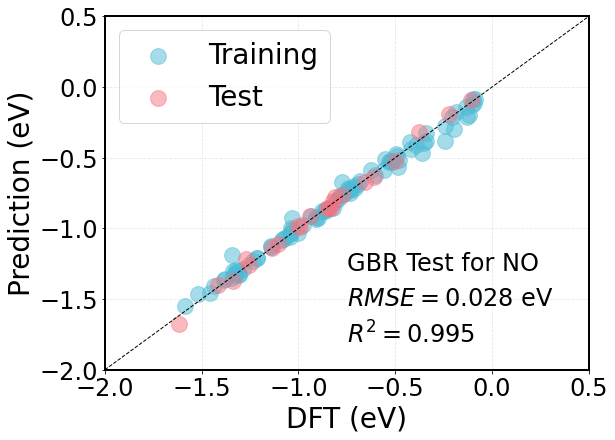

In [54]:
X_train, X_test, y_train, y_test = train_test_split(features, target_NO, train_size= 0.8, random_state=45) 

# 开始做测试
y_tr_pred = model_optimized.predict(X_train)
y_te_pred = model_optimized.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_tr_pred, y_train))
print('RMSE for train: {:.4f} eV'.format(RMSE))
R_squr_train = r2_score(y_train, y_tr_pred)
print ('R^2 for train {:.4f} eV'.format(R_squr_train))

RMSE = np.sqrt(mean_squared_error(y_te_pred, y_test))
print('RMSE for test: {:.4f} eV'.format(RMSE))
R_squr = r2_score(y_test, y_te_pred)
print ('R^2 for test {:.4f} eV'.format(R_squr))


# 画图  
font = {'size': '28'}
plt.rc('font', **font)

fig, ax = plt.subplots(figsize=(8.67, 6.5))
ax.scatter(y_train, y_tr_pred, alpha=0.5, c='#4DBBD5', marker='o', label='Training', s=250)
ax.scatter(y_test, y_te_pred, alpha=0.5, c='#f67280', marker='o', label='Test', s=250)

plt.xlim(-2, 0.5)
plt.ylim(-2, 0.5)

ax.set_xlabel('DFT (eV)')
ax.set_ylabel('Prediction (eV)')

xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, 
        scalex=False, scaley=False)


y_major_locator=MultipleLocator(0.5)
ax.yaxis.set_major_locator(y_major_locator)
x_major_locator=MultipleLocator(0.5)
ax.xaxis.set_major_locator(x_major_locator)
plt.tick_params(labelsize=24)

ax.spines['bottom'].set_linewidth(2);
ax.spines['left'].set_linewidth(2);  
ax.spines['right'].set_linewidth(2); 
ax.spines['top'].set_linewidth(2); 


plt.grid(axis='x', ls='--', alpha=0.3)
plt.grid(axis='y', ls='--', alpha=0.3)


plt.text(0.5, 0.3, 'GBR Test for NO', horizontalalignment='left',
     verticalalignment='center', transform=ax.transAxes, fontsize=24)
plt.text(0.5, 0.2, '$RMSE = %0.3f$ eV'% RMSE, horizontalalignment='left',
     verticalalignment='center', transform=ax.transAxes, fontsize=24)
plt.text(0.5, 0.1, '$R^2 = %0.3f$'% R_squr, horizontalalignment='left',
     verticalalignment='center', transform=ax.transAxes,fontsize=24)

plt.legend(loc=0)
# plt.title('GBR')
# plt.savefig('./NO.jpg', dpi=600, bbox_inches='tight')
plt.show()

In [55]:
print ('--- start 500 trails repeat ---')
R2_2nd = []
RMSE_2nd = []
R2_2nd_test = []
RMSE_2nd_test = []
for i in range(0,500):
    # Randomly split data
    X_train, X_test, y_train, y_test = train_test_split(features, target_NO, train_size= 0.8) 

    # Predictions and evaluation for training set
    y_tr_pred = model_optimized.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_tr_pred, y_train))
    R_squr_train = r2_score(y_train, y_tr_pred)
    
    #print('RMSE for training (v2): {:.4f} eV'.format(rmse_train))
    #print('R^2 for train {:.4f}'.format(R_squr_train))
    
    # Store metrics for training set
    RMSE_2nd.append(rmse_train)
    R2_2nd.append(R_squr_train)
    
    # Predictions and evaluation for testing set
    y_te_pred = model_optimized.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_te_pred, y_test))
    R_squr_test = r2_score(y_test, y_te_pred)
    
    #print('RMSE for testing (v2): {:.4f} eV'.format(rmse_test))
    #print('R^2 for test {:.4f}'.format(R_squr_test))
    
    # Store metrics for testing set
    RMSE_2nd_test.append(rmse_test)
    R2_2nd_test.append(R_squr_test)

    
# mean_R2_2nd = np.mean(R2_2nd)
# mean_R2_2nd

text1 = pd.DataFrame({'gbr-rmse':RMSE_2nd})
text2 = pd.DataFrame({'gbr-r2':R2_2nd})
text3 = pd.DataFrame({'gbr-rmse_test':RMSE_2nd_test})
text4 = pd.DataFrame({'gbr-r2_test':R2_2nd_test})

# Calculate and print average values for training set
avg_rmse_train = np.mean(RMSE_2nd)
avg_r2_train = np.mean(R2_2nd)

print('Average RMSE for training set: {:.4f} eV'.format(avg_rmse_train))
print('Average R^2 for training set: {:.4f}'.format(avg_r2_train))

# Calculate and print average values for testing set
avg_rmse_test = np.mean(RMSE_2nd_test)
avg_r2_test = np.mean(R2_2nd_test)

print('Average RMSE for testing set: {:.4f} eV'.format(avg_rmse_test))
print('Average R^2 for testing set: {:.4f}'.format(avg_r2_test))

--- start 500 trails repeat ---
Average RMSE for training set: 0.0380 eV
Average R^2 for training set: 0.9909
Average RMSE for testing set: 0.0363 eV
Average R^2 for testing set: 0.9906


In [56]:
# Concatenate DataFrames along columns
result_df = pd.concat([text1, text2, text3, text4], axis=1)

# Write the concatenated DataFrame to an Excel file
result_df.to_excel('500_trials_repeat_NO.xlsx', index=False)

# Optimized model for OH adsorption energy prediciton

In [57]:
# Optimized model for NO adsorption energy prediciton# Read data
df3 = pd.read_excel('../../Feature_OH.xlsx', sheet_name= "ML_features")
target_OH = df3.iloc[:,-1]
features
model_optimized.fit(features, target_OH)

GradientBoostingRegressor(learning_rate=0.15, loss='ls', max_depth=4,
                          min_samples_leaf=4, min_samples_split=5,
                          random_state=42)

RMSE for train: 0.0472 eV
R^2 for train 0.9982 eV
RMSE for test: 0.0291 eV
R^2 for test 0.9994 eV


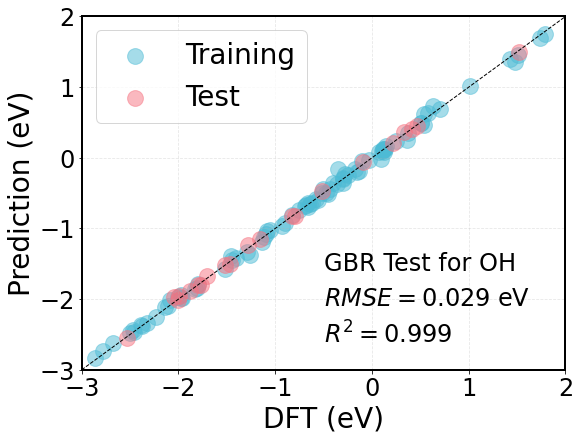

In [58]:
X_train, X_test, y_train, y_test = train_test_split(features, target_OH, train_size= 0.8, random_state=45) 

y_tr_pred = model_optimized.predict(X_train)
y_te_pred = model_optimized.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_tr_pred, y_train))
print('RMSE for train: {:.4f} eV'.format(RMSE))
R_squr_train = r2_score(y_train, y_tr_pred)
print ('R^2 for train {:.4f} eV'.format(R_squr_train))

RMSE = np.sqrt(mean_squared_error(y_te_pred, y_test))
print('RMSE for test: {:.4f} eV'.format(RMSE))
R_squr = r2_score(y_test, y_te_pred)
print ('R^2 for test {:.4f} eV'.format(R_squr))

# 画图  
font = {'size': '28'}
plt.rc('font', **font)

fig, ax = plt.subplots(figsize=(8.67, 6.5))
ax.scatter(y_train, y_tr_pred, alpha=0.5, c='#4DBBD5', marker='o', label='Training', s=250)
ax.scatter(y_test, y_te_pred, alpha=0.5, c='#f67280', marker='o', label='Test', s=250)

plt.xlim(-3, 2)
plt.ylim(-3, 2)

ax.set_xlabel('DFT (eV)')
ax.set_ylabel('Prediction (eV)')

xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, 
        scalex=False, scaley=False)


y_major_locator=MultipleLocator(1)
ax.yaxis.set_major_locator(y_major_locator)
x_major_locator=MultipleLocator(1)
ax.xaxis.set_major_locator(x_major_locator)
plt.tick_params(labelsize=24)

ax.spines['bottom'].set_linewidth(2);
ax.spines['left'].set_linewidth(2);  
ax.spines['right'].set_linewidth(2); 
ax.spines['top'].set_linewidth(2); 

plt.grid(axis='x', ls='--', alpha=0.3)
plt.grid(axis='y', ls='--', alpha=0.3)


plt.text(0.5, 0.3, 'GBR Test for OH', horizontalalignment='left',
     verticalalignment='center', transform=ax.transAxes, fontsize=24)
plt.text(0.5, 0.2, '$RMSE = %0.3f$ eV'% RMSE, horizontalalignment='left',
     verticalalignment='center', transform=ax.transAxes, fontsize=24)
plt.text(0.5, 0.1, '$R^2 = %0.3f$'% R_squr, horizontalalignment='left',
     verticalalignment='center', transform=ax.transAxes,fontsize=24)

plt.legend(loc=0)
# plt.title('GBR')
# plt.savefig('./OH.jpg', dpi=600, bbox_inches='tight')
plt.show()

In [59]:
print ('---start 500 trails repeat  ---')
R2_2nd = []
RMSE_2nd = []
R2_2nd_test = []
RMSE_2nd_test = []
for i in range(0,500):
    # Randomly split data
    X_train, X_test, y_train, y_test = train_test_split(features, target_OH, train_size= 0.8) 

    # Predictions and evaluation for training set
    y_tr_pred = model_optimized.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_tr_pred, y_train))
    R_squr_train = r2_score(y_train, y_tr_pred)
    
    #print('RMSE for training (v2): {:.4f} eV'.format(rmse_train))
    #print('R^2 for train {:.4f}'.format(R_squr_train))
    
    # Store metrics for training set
    RMSE_2nd.append(rmse_train)
    R2_2nd.append(R_squr_train)
    
    # Predictions and evaluation for testing set
    y_te_pred = model_optimized.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_te_pred, y_test))
    R_squr_test = r2_score(y_test, y_te_pred)
    
    #print('RMSE for testing (v2): {:.4f} eV'.format(rmse_test))
    #print('R^2 for test {:.4f}'.format(R_squr_test))
    
    # Store metrics for testing set
    RMSE_2nd_test.append(rmse_test)
    R2_2nd_test.append(R_squr_test)
    
# mean_R2_2nd = np.mean(R2_2nd)
# mean_R2_2nd

text1 = pd.DataFrame({'gbr-rmse':RMSE_2nd})
text2 = pd.DataFrame({'gbr-r2':R2_2nd})
text3 = pd.DataFrame({'gbr-rmse_test':RMSE_2nd_test})
text4 = pd.DataFrame({'gbr-r2_test':R2_2nd_test})

# Calculate and print average values for training set
avg_rmse_train = np.mean(RMSE_2nd)
avg_r2_train = np.mean(R2_2nd)

print('Average RMSE for training set: {:.4f} eV'.format(avg_rmse_train))
print('Average R^2 for training set: {:.4f}'.format(avg_r2_train))

# Calculate and print average values for testing set
avg_rmse_test = np.mean(RMSE_2nd_test)
avg_r2_test = np.mean(R2_2nd_test)

print('Average RMSE for testing set: {:.4f} eV'.format(avg_rmse_test))
print('Average R^2 for testing set: {:.4f}'.format(avg_r2_test))

---start 500 trails repeat  ---
Average RMSE for training set: 0.0441 eV
Average R^2 for training set: 0.9985
Average RMSE for testing set: 0.0431 eV
Average R^2 for testing set: 0.9983


In [60]:
# Concatenate DataFrames along columns
result_df = pd.concat([text1, text2, text3, text4], axis=1)

# Write the concatenated DataFrame to an Excel file
result_df.to_excel('500_trials_repeat_OH.xlsx', index=False)

# Optimized model for N2 adsorption energy prediciton

RMSE for train: 0.0414 eV
R^2 for train 0.9899 eV
RMSE for test: 0.0286 eV
R^2 for test 0.9941 eV


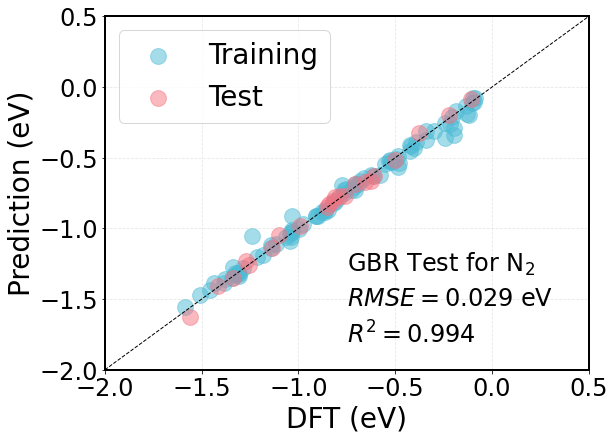

In [61]:
# Read data
df4 = pd.read_excel('../../Feature_N2.xlsx', sheet_name= "ML_features")
target_N2 = df4.iloc[:,-1]
features
model_optimized.fit(features, target_N2)

X_train, X_test, y_train, y_test = train_test_split(features, target_N2, train_size= 0.8, random_state=45) 

# 开始做测试
y_tr_pred = model_optimized.predict(X_train)
y_te_pred = model_optimized.predict(X_test)

RMSE = np.sqrt(mean_squared_error(y_tr_pred, y_train))
print('RMSE for train: {:.4f} eV'.format(RMSE))
R_squr_train = r2_score(y_train, y_tr_pred)
print ('R^2 for train {:.4f} eV'.format(R_squr_train))

RMSE = np.sqrt(mean_squared_error(y_te_pred, y_test))
print('RMSE for test: {:.4f} eV'.format(RMSE))
R_squr = r2_score(y_test, y_te_pred)
print ('R^2 for test {:.4f} eV'.format(R_squr))

# 画图  
font = {'size': '28'}
plt.rc('font', **font)

fig, ax = plt.subplots(figsize=(8.67, 6.5))
ax.scatter(y_train, y_tr_pred, alpha=0.5, c='#4DBBD5', marker='o', label='Training', s=250)
ax.scatter(y_test, y_te_pred, alpha=0.5, c='#f67280', marker='o', label='Test', s=250)

plt.xlim(-2, 0.5)
plt.ylim(-2, 0.5)

ax.set_xlabel('DFT (eV)')
ax.set_ylabel('Prediction (eV)')

xpoints = ypoints = plt.xlim()
plt.plot(xpoints, ypoints, linestyle='--', color='k', lw=1, 
        scalex=False, scaley=False)


y_major_locator=MultipleLocator(0.5)
ax.yaxis.set_major_locator(y_major_locator)
x_major_locator=MultipleLocator(0.5)
ax.xaxis.set_major_locator(x_major_locator)
plt.tick_params(labelsize=24)

ax.spines['bottom'].set_linewidth(2);
ax.spines['left'].set_linewidth(2);  
ax.spines['right'].set_linewidth(2); 
ax.spines['top'].set_linewidth(2); 


plt.grid(axis='x', ls='--', alpha=0.3)
plt.grid(axis='y', ls='--', alpha=0.3)


plt.text(0.5, 0.3, 'GBR Test for N$_2$', horizontalalignment='left',
     verticalalignment='center', transform=ax.transAxes, fontsize=24)
plt.text(0.5, 0.2, '$RMSE = %0.3f$ eV'% RMSE, horizontalalignment='left',
     verticalalignment='center', transform=ax.transAxes, fontsize=24)
plt.text(0.5, 0.1, '$R^2 = %0.3f$'% R_squr, horizontalalignment='left',
     verticalalignment='center', transform=ax.transAxes,fontsize=24)

plt.legend(loc=0)
# plt.title('GBR')
plt.savefig('./N2.jpg', dpi=600, bbox_inches='tight')
plt.show()

In [62]:
print ('---start 500 trails repeat ---')
R2_2nd = []
RMSE_2nd = []
R2_2nd_test = []
RMSE_2nd_test = []
for i in range(0,500):
    # Randomly split data
    X_train, X_test, y_train, y_test = train_test_split(features, target_N2, train_size= 0.8) 

    # Predictions and evaluation for training set
    y_tr_pred = model_optimized.predict(X_train)
    rmse_train = np.sqrt(mean_squared_error(y_tr_pred, y_train))
    R_squr_train = r2_score(y_train, y_tr_pred)
    
    #print('RMSE for training (v2): {:.4f} eV'.format(rmse_train))
    #print('R^2 for train {:.4f}'.format(R_squr_train))
    
    # Store metrics for training set
    RMSE_2nd.append(rmse_train)
    R2_2nd.append(R_squr_train)
    
    # Predictions and evaluation for testing set
    y_te_pred = model_optimized.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_te_pred, y_test))
    R_squr_test = r2_score(y_test, y_te_pred)
    
    #print('RMSE for testing (v2): {:.4f} eV'.format(rmse_test))
    #print('R^2 for test {:.4f}'.format(R_squr_test))
    
    # Store metrics for testing set
    RMSE_2nd_test.append(rmse_test)
    R2_2nd_test.append(R_squr_test)
    
# mean_R2_2nd = np.mean(R2_2nd)
# mean_R2_2nd

text1 = pd.DataFrame({'gbr-rmse':RMSE_2nd})
text2 = pd.DataFrame({'gbr-r2':R2_2nd})
text3 = pd.DataFrame({'gbr-rmse_test':RMSE_2nd_test})
text4 = pd.DataFrame({'gbr-r2_test':R2_2nd_test})

# Calculate and print average values for training set
avg_rmse_train = np.mean(RMSE_2nd)
avg_r2_train = np.mean(R2_2nd)

print('Average RMSE for training set: {:.4f} eV'.format(avg_rmse_train))
print('Average R^2 for training set: {:.4f}'.format(avg_r2_train))

# Calculate and print average values for testing set
avg_rmse_test = np.mean(RMSE_2nd_test)
avg_r2_test = np.mean(R2_2nd_test)

print('Average RMSE for testing set: {:.4f} eV'.format(avg_rmse_test))
print('Average R^2 for testing set: {:.4f}'.format(avg_r2_test))


---start 500 trails repeat ---
Average RMSE for training set: 0.0388 eV
Average R^2 for training set: 0.9907
Average RMSE for testing set: 0.0384 eV
Average R^2 for testing set: 0.9896


In [63]:
# Concatenate DataFrames along columns
result_df = pd.concat([text1, text2, text3, text4], axis=1)

# Write the concatenated DataFrame to an Excel file
result_df.to_excel('500_trials_repeat_N2.xlsx', index=False)